# Project: Maze

P-14.80
One way to construct a maze starts with an n×n grid such that each grid cell is bounded by four unit-length walls. We then remove two boundary unit-length  walls,  to represent  the  start  and  finish. For each  remaining unit-length wall not on the boundary, we assign a random value and create a graph G, called the dual, such that each grid cell is a vertex in G and there is an edge joining the vertices for two cells if and only if the cells share a common wall. The weight of each edge is the weight of the corresponding wall. We construct the maze by finding a minimum spanning tree T for G and removing all the walls corresponding  to edges in T.

Write a program that uses this algorithm to generate mazes and thensolves them. Minimally, your program should draw the maze and, ideally, it should visualize the solution as well.

## Randomized Kruskal's algorithm

This algorithm is a randomized version of Kruskal's algorithm.

1. Create a list of all walls, and create a set for each cell, each containing just that one cell.

2. For each wall, in some random order:

    a. If the cells divided by this wall belong to distinct sets:

        i. Remove the current wall.
        
        ii. Join the sets of the formerly divided cells.

There are several data structures that can be used to model the sets of cells. An efficient implementation using a disjoint-set data structure can perform each union and find operation on two sets in nearly constant amortized time, so the running time of this algorithm is essentially proportional to the number of walls available to the maze.

It matters little whether the list of walls is initially randomized or if a wall is randomly chosen from a nonrandom list, either way is just as easy to code.

Because the effect of this algorithm is to produce a minimal spanning tree from a graph with equally weighted edges, it tends to produce regular patterns which are fairly easy to solve.

## Randomized Prim's algorithm
This algorithm is a randomized version of Prim's algorithm.

1. Start with a grid full of walls.

2. Pick a cell, mark it as part of the maze. Add the walls of the cell to the wall list.

3. While there are walls in the list:

    a. Pick a random wall from the list. If only one of the two cells that the wall divides is visited, then:

        i. Make the wall a passage and mark the unvisited cell as part of the maze.

        ii. Add the neighboring walls of the cell to the wall list.

    b. Remove the wall from the list.

Note that simply running classical Prim's on a graph with random edge weights would create mazes stylistically identical to Kruskal's, because they are both minimal spanning tree algorithms. Instead, this algorithm introduces stylistic variation because the edges closer to the starting point have a lower effective weight.

#### Textbook Code

In [ ]:
Nested Vertex Class

In [11]:
class Vertex:
    """Lightweight vertex structure for a graph"""
    __slots__ = '_element'

    def __init__(self, x):
        """Do not call constructor directly. Use Graph's insert_vertex(x).
        """
        self._element = x 

    def element(self):
        """Return element associate with this vertex.
        """
        return self._element

    def __hash__(self):         # Will allow vertex to be a map/set key
        return hash(id(self))

Nested Edge Class

In [12]:
class Edge:
    """Lightwight edge structure for a graph.
    """
    __slots__ = '_orgin', '_destination', '_element' 

    def __init__(self, u, v, x):
        """Do not call constructor directly. Use Graph's insert_edge(u, v, x)
        """
        self._orgin = u 
        self._destination = v
        self._element = x

    def endpoints(self):
        """Return (u, v) tuple for vertices u and v
        """
        return (self._orgin, self._destination)

    def opposite(self, v):
        """Return elemeent associate with this edge
        """
        return self._element

    def __hash__(self):         # Will allow edge to be a map/set key
        return hash((self._orgin, self._destination))

In [ ]:
class Graph:
    """Representation of a simple graph usnig an adjency map.
    """
    def __init__(self, directed = False):
        """Created an empty graph (undirected, by default).
        Graph is directed if optional parameter is set to True 
        """
        self._outgoing = {}
        # only create second map for directed graph; use alias for undireccted.
        self._incoming = {} if directed else self._outgoing

    def is_directed(self):
        """Return True if this is directed graph; False if undirected.
        Property is based on the orgional declaration of the graph, not its contents
        """
        return self._incoming is not self.outgoing # Directed if maps are distinct 

    def vertex_count(self):
        """Return the number of vertices in the graph. 
        """
        return len(self._outgoing)
    
    def vertices(self):
        """Return an iteration of all verticies of the graph
        """
        return self._outgoing.keys()

    def edge_count(self):
        """Return the number of edges inthe graph
        """
        total = sum(len(self._outgoing[v]) for v in self._outgoing)
        # For undirected graphs, make sure not to double count edges
        return total if self.is_directed() else total // 2
    
    def edges(self):
        """Return a set of all edges of the graph
        """
        result = set()    # Avoid double-reporting edges of undirected graphs
        for secondary_map in self._outgoing.values():
            results.update(secondary_map.values())# Add edges to resulting set
        return result 
    
    def get_edge(self, u, v):
        """Return the edge from u to v, or None if not adjacent
        """
        return self._outgoing[u].get(v) #return None if V not adjacent

    def degree(self, v, outgoing=True):
        """Return number of (outgoing) edges incident to vertex v in the graph
        If graph is directed, optional parameter used to count incoming edges.
        """
        adj = self._outgoing if outgoing else self._incoming
        for edge in adj[v].values():
            yield edge

    def insert_vertex(self, x = None): 
        """Insert and return a new Vertex with element x
        """
        v = self. Vertex(x)
        self._outgoing[v] = {}
        if self.is_directed():
            self._incoming[v] = {} # Need to distinct map for incoming edges
        return v

    def insert_edge(self, u, v, x=None):
        """Insert and return a new Edge from u to v with auxiliary element x
        """
        e = self.Edge(u, v, x)
        self._outgoing[u][v] = e
        self._incoming[v][u] = e
    

In [ ]:
MST Prim Jarnik

In [ ]:
def MST_PrimJarnik(g):
    """Compute a minimum spanning tree of weighted graph g.
    Return a list of edges that comprise the MST(arpirtary order)
    """
    d = {} # d[v] is bound on distance to tree
    tree = [] # list of edges in spanning tree
    pq = AdaptableHeapPriorityQueue( )# d[v] maps to value (v, e=(u,v))
    pqlocator ={}# map from vertex to its pq locator

# for each vertex v of the graph, add an entry to the priority queue, with
# the source having distance 0 and all others having infinite distance
    for v in g.vertices( ):
        if len(d) == 0:         # This is the first node
            d[v] = 0            # Make it in root
        else: 
            d[v] = float('inf')    # Positive infinity 
        pdlocator[v] = pd.add(d[v], (v, None))

    while not pd.is_empty():
        key,value = pd.remove_min()
        u, edge = value         # Unpack tuple for pq
        del pqlocator[u]        # U is no longer in pq
        if edge is not None:
            tree.append(edge)   # Add edge to tree
        for link in g.incident_edges(u):
            v = link.opposite(u)
            if v in pqlocator: 
                # see if edge (u, v) bettr connets v to grouwing tree
                wgt = link.element()
                if wgt<d[v]:
                    d[v] = wgt 
                    pq.update(pdlocator[v], d[v], (v, link))
    return tree




### Imports

In [3]:
import random 
import turtle 
import matplotlib 
import numpy as np

In [ ]:


class Grid():

    def __init__(self, grid, n = 4):
        """Initalization
        n = number of dimentions so n = 4 => 4 x 4 grid
        """
        self.grid = {}
        self.h = h
        self.w = w

        #I would have to have soemthing for if it was visited no? but would that go into the search?
        # Could also include some kind of vertice counter or is that in the search function for the edge counter?

    def node(self, x, y):
        """Being the single cell but should have node properties
        Should have a north, south, east, west direction function? 

        the x y should refer to an indicies in the grid no?
        """
        self.x = x
        self.y = y
        
    def nodegrid(self):
        """ fills the grid with nodes

        or should I make the grid 0? and then replace/append the 0's 
        """

    def edge(self):
        """defing what an edge is
        """
    
    def isedge(self)
        """Check this node edges buy returning the edge count and direction

        unsure if this is needed?
        """
        
    def removebound(self):
        """removing two boundries/edges at random  
        """

    def start_finish(self):
        """ find what boundaries were removed and 
        denote the start and finish 
        """

    def weightedge_dual_G(self):
        """at random give the edges a weight
        """

In [2]:
class Maze():
    """ constructing the maze by MST using the weightedge_dual_G to remove 
    all the walls corresponding to the edges
    """

    def search():
        """ using a serch algrothim find the shortrest path in the grid
        """

    def removeedge():
        """ remove edges not found in the search...
        imo I would remove edges at random THEN search the remanding paths.
        """

    def printmaze():
        """ print the maze 
        turtle?
        denote start, end here from the two boundaris removed
        some how show the maze solution
        """

    

# Reflection

I failed to properly manage my time for this project argo not much or in my book andy good progress. I do have the pseude code to work on it but there are some thoughts and questions that I still dont know how to fingure out.

1. Why would I remove all the edge and not some to make the maze?

2. From the many examples I have looked at the maze is either a) generate at random or b) maze is predertermiend and the solving is by MST. But I have yet to see a maze created by MST. 

3. I would have to have soemthing for if it was visited no? but would that go into the search?
 

Below is an outline of what I think is supposed to happen?

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://media.discordapp.net/attachments/205822795874172928/789211369986719814/de4322b16dbc6834de8acab099154a14.png?width=732&height=234")

or link this link: 

https://graphonline.ru/en/?graph=iPtEOFiuBJYOxKxw

or this one

https://graphonline.ru/en/?graph=XmjZvjPVaTLJNpKM

### Meeting Notes: 

- Generate a  graph with a (random or set?) number of nodes (n)

- Also generate a randome number of connections and edges (k)

- k > n 

- Output: 

Graph 1: 

- n nodes

- k random.edge where k > n 

- Randome weights on the edges 

Graph 2: 

- The MST skeleton graph

Other notes: 

Generate the minimum spanning tree (MST) on the weights then; 
    find rate of A -> B weith smalles numerical vlaue
    and knock out the walls after finding ther solution. 


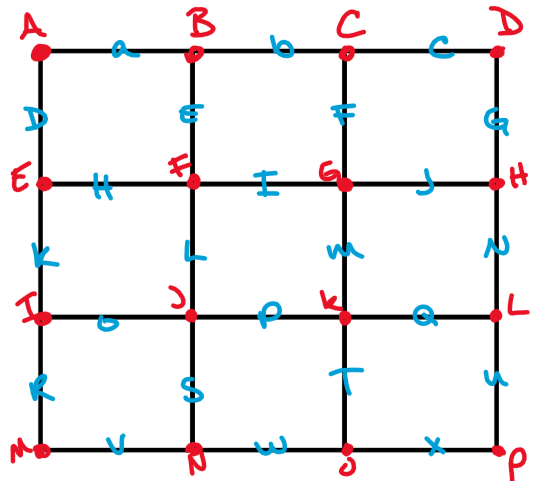

In [23]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "Capture.png")